In [33]:
import pandas as pd
from gplearn.genetic import SymbolicRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn import metrics
import hydroeval as he
from sklearn.utils import resample  

In [34]:
df=pd.read_csv('Data (1).csv')
df.head(10)

,Unnamed: 0,Year,Mon,Month,PRCP,TMAX,TMIN,RH,EVP,TSUN,U2,PET,SPI
0,1,Jan-61,1,JAN,1.0,33.6,19.4,69,5.8,7.2,3.0,168.883256,0.493176
1,2,Feb-61,2,FEB,0.0,34.8,17.2,47,9.3,8.2,3.0,167.010819,-0.253347
2,3,Mar-61,3,MAR,6.9,32.3,22.2,57,8.4,6.7,3.0,160.905812,-1.494443
3,4,Apr-61,4,APR,148.5,31.9,22.8,74,4.4,6.4,3.0,153.172840,0.735983
4,5,May-61,5,MAY,120.9,31.1,22.2,78,2.9,6.7,3.0,147.606832,-0.496127
5,6,Jun-61,6,JUN,175.3,29.5,21.1,81,2.4,6.1,4.0,119.733799,-0.156356
6,7,Jul-61,7,JUL,127.3,28.8,21.1,85,1.7,2.6,4.0,122.098866,-0.269629
7,8,Aug-61,8,AUG,44.7,28.6,20.0,82,2.3,3.9,4.0,131.889089,-1.391956
8,9,Sep-61,9,SEP,167.6,29.3,20.5,85,2.0,3.7,3.0,149.650889,-0.692826
9,10,Oct-61,10,OCT,45.2,28.9,20.5,76,3.1,6.6,3.0,153.223513,-1.566671


In [35]:
df.drop(columns='Unnamed: 0', inplace=True)

In [36]:
#Descriptive statistics
df.describe()

,Mon,PRCP,TMAX,TMIN,RH,EVP,TSUN,U2,PET,SPI
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,6.500000,102.525152,32.314545,21.242273,74.492424,4.921970,6.257879,4.260455,159.356288,0.161051
std,3.454671,97.089377,2.502484,1.705846,12.609037,2.806012,1.527646,1.442903,25.997336,0.915672
min,1.000000,0.000000,27.600000,11.300000,22.000000,1.000000,2.200000,1.000000,101.769129,-3.181531
25%,3.750000,7.800000,30.100000,20.500000,69.000000,2.600000,5.200000,3.000000,138.266980,-0.267953
50%,6.500000,86.200000,32.400000,21.400000,78.000000,4.200000,6.600000,4.000000,158.015148,0.253347
75%,9.250000,169.825000,34.300000,22.200000,84.000000,6.900000,7.400000,5.100000,178.569226,0.675011
max,12.000000,511.700000,37.900000,26.200000,98.000000,13.800000,9.500000,8.600000,246.591195,3.094368



Correlation matrix:
           Mon      PRCP      TMAX      TMIN        RH       EVP      TSUN  \
Mon   1.000000  0.161663 -0.422416 -0.325203  0.318835 -0.416617 -0.164468   
PRCP  0.161663  1.000000 -0.584730  0.212441  0.646370 -0.668602 -0.437239   
TMAX -0.422416 -0.584730  1.000000  0.077437 -0.653463  0.748650  0.697006   
TMIN -0.325203  0.212441  0.077437  1.000000  0.338338 -0.102633 -0.014840   
RH    0.318835  0.646370 -0.653463  0.338338  1.000000 -0.790364 -0.474274   
EVP  -0.416617 -0.668602  0.748650 -0.102633 -0.790364  1.000000  0.494353   
TSUN -0.164468 -0.437239  0.697006 -0.014840 -0.474274  0.494353  1.000000   
U2   -0.249821  0.078112  0.007148  0.372551  0.044985  0.033774 -0.095670   
PET  -0.338680 -0.413278  0.807829  0.097076 -0.497305  0.547390  0.591075   
SPI   0.029718  0.378746  0.144849 -0.155919 -0.064192  0.049192  0.131802   

            U2       PET       SPI  
Mon  -0.249821 -0.338680  0.029718  
PRCP  0.078112 -0.413278  0.378746  
TMAX  0.0

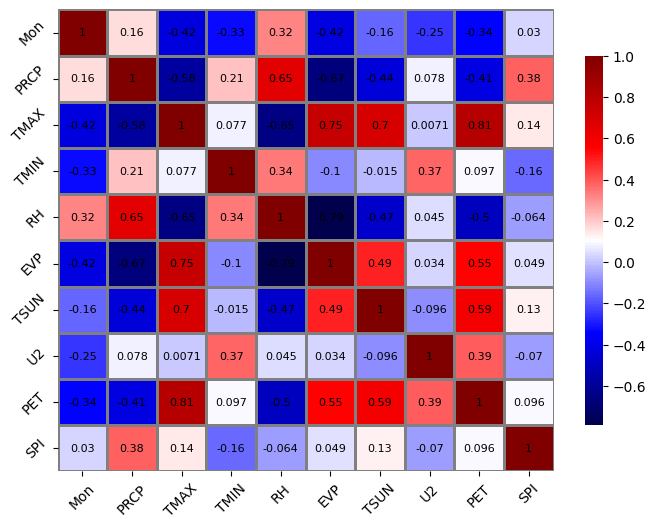

In [37]:
# Remove any non-numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr = df_numeric.corr()
print("\nCorrelation matrix:")
print(corr)

# Display the correlation matrix
print("Correlation Matrix")
print(corr)
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(corr,
                      cmap='seismic', 
                      linewidth=0.75,
                      linecolor='gray',
                      cbar_kws={"shrink": .8},
                      annot=True,
                      annot_kws={'size': 8, 'color': 'black'})

heatmap.tick_params(labelsize=10, rotation=45)

In [38]:
df.drop(columns='Month', inplace=True)
df.drop(columns='Year', inplace=True)

In [39]:
target='SPI'
y=df[target]
X=df.drop(columns=target)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
# Build and fit an AdaBoost regressor
reg_ada = AdaBoostRegressor()
reg_ada.fit(X_train, y_train)

#Prediction Train
train_pred = reg_ada .predict(X_train)


print("prediction for Train")
print ('MAE is:', metrics.mean_absolute_error(y_train, train_pred))
print('MSE is:', metrics.mean_squared_error(y_train, train_pred))
print('RMSE is:', np.sqrt(metrics.mean_squared_error(y_train, train_pred)))
print ('R.Sqd is:', r2_score(y_train, train_pred))
print ('Cor is:', math.sqrt(r2_score(y_train, train_pred)))
print ('NSE is:', he.evaluator(he.nse, y_train, train_pred))





print('')
#Prediction Test
y_pred = reg_ada.predict(X_test)


print("prediction for Test")
print ('MAE is:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE is:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE is:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('R.Sqd is:', r2_score(y_test, y_pred))
print ('Cor is:', math.sqrt(r2_score(y_train, train_pred)))
print ('NSE is:', he.evaluator(he.nse, y_train, train_pred))

prediction for Train
MAE is: 0.35139661073302786
MSE is: 0.18070081205113955
RMSE is: 0.4250891812915727
R.Sqd is: 0.784251338298199
Cor is: 0.8855796623106241
NSE is: [0.64293205]

prediction for Test
MAE is: 0.3782379688492026
MSE is: 0.2049356531870028
RMSE is: 0.45269819216228685
R.Sqd is: 0.7539440221427774
Cor is: 0.8855796623106241
NSE is: [0.64293205]


In [43]:
# Number of bootstrap iterations
n_bootstrap_samples = 100  
bootstrap_metrics = {'MAE': [], 'MSE': [], 'RMSE': [], 'R2': []}

# Perform bootstrapping
for _ in range(n_bootstrap_samples):
    # Create a bootstrap sample
    X_train_bootstrap, y_train_bootstrap = resample(X_train, y_train)

    # Build and fit the AdaBoost regressor
    reg_ada = AdaBoostRegressor()
    reg_ada.fit(X_train_bootstrap, y_train_bootstrap)
    
    # Predict on the test set
    y_pred_bootstrap = reg_ada.predict(X_test)
    
    # Calculate and store the metrics
    bootstrap_metrics['MAE'].append(mean_absolute_error(y_test, y_pred_bootstrap))
    bootstrap_metrics['MSE'].append(mean_squared_error(y_test, y_pred_bootstrap))
    bootstrap_metrics['RMSE'].append(np.sqrt(mean_squared_error(y_test, y_pred_bootstrap)))
    bootstrap_metrics['R2'].append(r2_score(y_test, y_pred_bootstrap))

# Calculate the mean and standard deviation of each metric
for metric, values in bootstrap_metrics.items():
    print(f'{metric}: Mean = {np.mean(values):.4f}, Std = {np.std(values):.4f}')

MAE: Mean = 0.4021, Std = 0.0180
MSE: Mean = 0.2524, Std = 0.0240
RMSE: Mean = 0.5018, Std = 0.0236
R2: Mean = 0.6970, Std = 0.0288


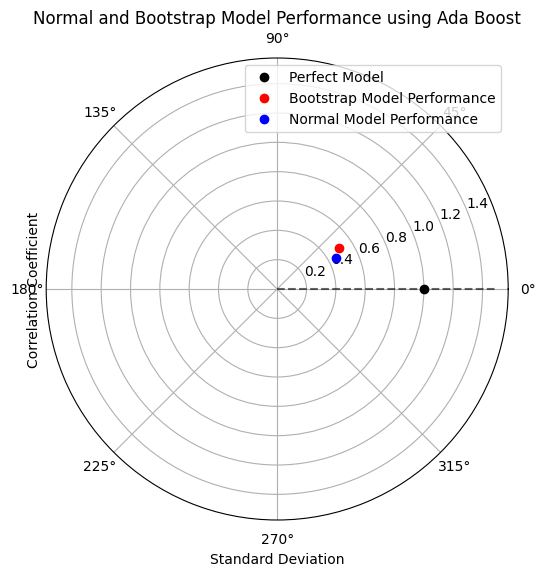

In [53]:
# Values from your normal model prediction
rmse_normal = 0.4527
correlation_normal = 0.8856 

# Mean and standard deviation values from your bootstrap results
mean_rmse_bootstrap = 0.5018 
std_rmse_bootstrap = 0.0236   
mean_r2_bootstrap = 0.6970    
std_r2_bootstrap = 0.0288     

# Mean R² to correlation coefficient
mean_correlation_bootstrap = np.sqrt(mean_r2_bootstrap)

# Taylor plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, polar=True)

# Reference point for a perfect model
ax.plot(0, 1, 'ko', label='Perfect Model')

# Point for the bootstrap model performance
theta_bootstrap = np.arccos(mean_correlation_bootstrap)
ax.plot(theta_bootstrap, mean_rmse_bootstrap, 'ro', label='Bootstrap Model Performance')

# Point for the normal model performance
theta_normal = np.arccos(correlation_normal)
ax.plot(theta_normal, rmse_normal, 'bo', label='Normal Model Performance')

# Draw standard deviation circles
std_devs = np.linspace(0, 1.5, 100)
ax.plot(np.zeros_like(std_devs), std_devs, 'k--', alpha=0.6)

# Configure the Taylor plot appearance
ax.set_xlabel('Standard Deviation')
ax.set_ylabel('Correlation Coefficient')
ax.set_title('Normal and Bootstrap Model Performance using Ada Boost')

plt.legend()
plt.show()

In [76]:
#Monte Carlo Cross-Validation fOr Ada Boost Regressor
n_iterations = 100
mccv_metrics = {'MAE': [], 'MSE': [], 'RMSE': [], 'R2': []}

# Monte Carlo Cross-Validation
for _ in range(n_iterations):
    # Randomly split the data
    X_train_mccv, X_val_mccv, y_train_mccv, y_val_mccv = train_test_split(X_train, y_train, test_size=0.2)

    # Build and fit the AdaBoost regressor
    reg_ada = AdaBoostRegressor()
    reg_ada.fit(X_train_mccv, y_train_mccv)
    
    # Predict on the validation set
    y_pred_mccv = reg_ada.predict(X_val_mccv)
    
    # Calculate and store the metrics
    mccv_metrics['MAE'].append(mean_absolute_error(y_val_mccv, y_pred_mccv))
    mccv_metrics['MSE'].append(mean_squared_error(y_val_mccv, y_pred_mccv))
    mccv_metrics['RMSE'].append(np.sqrt(mean_squared_error(y_val_mccv, y_pred_mccv)))
    mccv_metrics['R2'].append(r2_score(y_val_mccv, y_pred_mccv))

# Calculate the mean and standard deviation of each metric
for metric, values in mccv_metrics.items():
    print(f'{metric}: Mean = {np.mean(values):.4f}, Std = {np.std(values):.4f}')


MAE: Mean = 0.4073, Std = 0.0380
MSE: Mean = 0.2879, Std = 0.0544
RMSE: Mean = 0.5342, Std = 0.0505
R2: Mean = 0.6573, Std = 0.0538


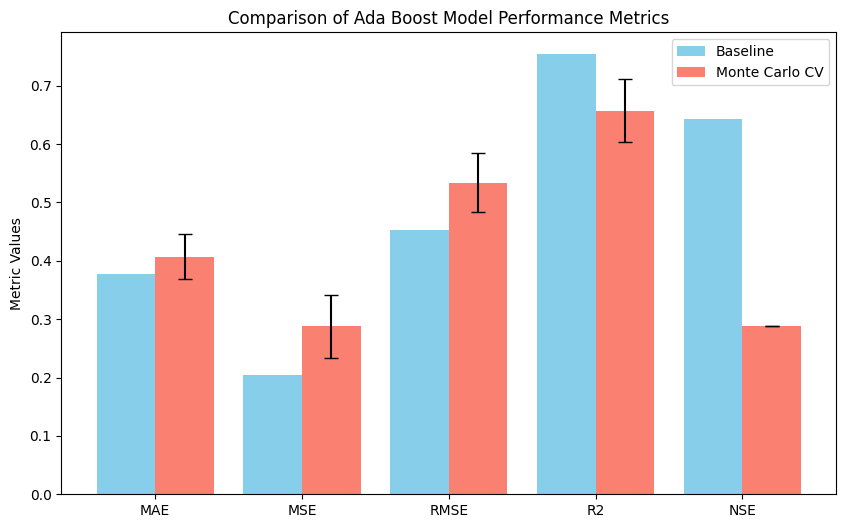

In [77]:
# Baseline metrics from your Adaboost original train-test split
baseline_metrics = {
    'MAE': 0.3782,
    'MSE': 0.2049,
    'RMSE': 0.4527,
    'R2': 0.7539,
    'NSE': 0.64293
}

# Mean metrics from Monte Carlo Cross-Validation
mccv_mean_metrics = {metric: np.mean(values) for metric, values in mccv_metrics.items()}
mccv_std_metrics = {metric: np.std(values) for metric, values in mccv_metrics.items()}

# Prepare data for plotting
metrics_names = list(baseline_metrics.keys())
baseline_values = list(baseline_metrics.values())
mccv_values = [mccv_mean_metrics['MAE'], mccv_mean_metrics['MSE'], mccv_mean_metrics['RMSE'], mccv_mean_metrics['R2'], mccv_mean_metrics['MSE']]

x = np.arange(len(metrics_names))

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - 0.2, baseline_values, 0.4, color='skyblue', label='Baseline')  # Change color for baseline bars
ax.bar(x + 0.2, mccv_values, 0.4, color='salmon', yerr=[mccv_std_metrics['MAE'], mccv_std_metrics['MSE'], mccv_std_metrics['RMSE'], mccv_std_metrics['R2'], 0], 
       label='Monte Carlo CV', capsize=5)  # Change color for MCCV bars

# Add labels and title
ax.set_xticks(x)
ax.set_xticklabels(metrics_names)
ax.set_ylabel('Metric Values')
ax.set_title('Comparison of Ada Boost Model Performance Metrics')
ax.legend()

plt.show()


In [12]:
# Build and fit an Random Forest regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

#Prediction Train
train_pred = rf .predict(X_train)


print("prediction for Train")
print ('MAE is:', metrics.mean_absolute_error(y_train, train_pred))
print('MSE is:', metrics.mean_squared_error(y_train, train_pred))
print('RMSE is:', np.sqrt(metrics.mean_squared_error(y_train, train_pred)))
print ('R.Sqd is:', r2_score(y_train, train_pred))
print ('Cor is:', math.sqrt(r2_score(y_train, train_pred)))
print ('NSE is:', he.evaluator(he.nse, y_train, train_pred))





print('')
#Prediction Test
y_pred = rf.predict(X_test)


print("prediction for Test")
print ('MAE is:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE is:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE is:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('R.Sqd is:', r2_score(y_test, y_pred))
print ('Cor is:', math.sqrt(r2_score(y_train, train_pred)))
print ('NSE is:', he.evaluator(he.nse, y_train, train_pred))

prediction for Train
MAE is: 0.09893624162300872
MSE is: 0.025255776897718782
RMSE is: 0.15892066227435242
R.Sqd is: 0.9698457355887254
Cor is: 0.9848074611764096
NSE is: [0.96277371]

prediction for Test
MAE is: 0.22154811085363643
MSE is: 0.10671228607936789
RMSE is: 0.3266684650825174
R.Sqd is: 0.8718759010825755
Cor is: 0.9848074611764096
NSE is: [0.96277371]


In [58]:
n_boostrap_samples=100
bootstrap_metrics={'MSE':[], 'MAE':[], 'RMSE':[], 'R2':[]}
 
for i in range(n_bootstrap_samples):
     X_train_bootstrap, y_train_bootstrap=resample(X_train, y_train)
     rf=RandomForestRegressor()
     rf.fit(X_train_bootstrap, y_train_bootstrap)
     y_pred_bootstrap=rf.predict(X_test)
     bootstrap_metrics['MSE'].append(mean_squared_error(y_pred_bootstrap, y_test))
     bootstrap_metrics['MAE'].append(mean_absolute_error(y_pred_bootstrap, y_test))
     bootstrap_metrics['RMSE'].append(np.sqrt(mean_squared_error(y_pred_bootstrap, y_test)))
     bootstrap_metrics['R2'].append(r2_score(y_pred_bootstrap, y_test))
     

# Calculate the mean and standard deviation of each metric
for metric, values in bootstrap_metrics.items():
    print(f'{metric}: Mean = {np.mean(values):.4f}, Std = {np.std(values):.4f}')

MSE: Mean = 0.1652, Std = 0.0273
MAE: Mean = 0.2768, Std = 0.0223
RMSE: Mean = 0.4050, Std = 0.0341
R2: Mean = 0.6935, Std = 0.0576


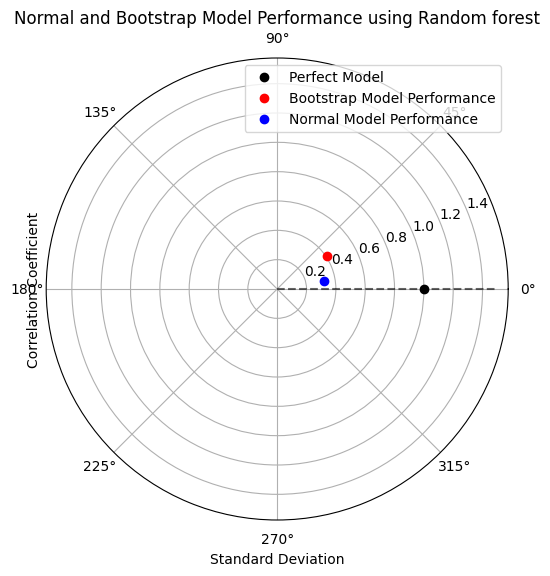

In [60]:
# Values from normal model prediction
rmse_normal = 0.3267
correlation_normal = 0.9848

# Mean and standard deviation values from your bootstrap results
mean_rmse_bootstrap = 0.4050
std_rmse_bootstrap = 0.0341  
mean_r2_bootstrap = 0.6935    
std_r2_bootstrap = 0.0576    

# Mean R² to correlation coefficient
mean_correlation_bootstrap = np.sqrt(mean_r2_bootstrap)

# Taylor plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, polar=True)

# Reference point for a perfect model
ax.plot(0, 1, 'ko', label='Perfect Model')

# Point for the bootstrap model performance
theta_bootstrap = np.arccos(mean_correlation_bootstrap)
ax.plot(theta_bootstrap, mean_rmse_bootstrap, 'ro', label='Bootstrap Model Performance')

# Point for the normal model performance
theta_normal = np.arccos(correlation_normal)
ax.plot(theta_normal, rmse_normal, 'bo', label='Normal Model Performance')

# Draw standard deviation circles
std_devs = np.linspace(0, 1.5, 100)
ax.plot(np.zeros_like(std_devs), std_devs, 'k--', alpha=0.6)

# Configure the Taylor plot appearance
ax.set_xlabel('Standard Deviation')
ax.set_ylabel('Correlation Coefficient')
ax.set_title('Normal and Bootstrap Model Performance using Random forest')

plt.legend()
plt.show()

In [62]:
#  Monte Carlo Cross-Validation for Random forest n_iterations = 100
mccv_metrics = {'MAE': [], 'MSE': [], 'RMSE': [], 'R2': []}

# Perform Monte Carlo Cross-Validation
for _ in range(n_iterations):
    # Randomly split the data
    X_train_mccv, X_val_mccv, y_train_mccv, y_val_mccv = train_test_split(X_train, y_train, test_size=0.2)

    # Build and fit the AdaBoost regressor
    rf= RandomForestRegressor()
    rf.fit(X_train_mccv, y_train_mccv)
    
    # Predict on the validation set
    y_pred_mccv = reg_ada.predict(X_val_mccv)
    
    # Calculate and store the metrics
    mccv_metrics['MAE'].append(mean_absolute_error(y_val_mccv, y_pred_mccv))
    mccv_metrics['MSE'].append(mean_squared_error(y_val_mccv, y_pred_mccv))
    mccv_metrics['RMSE'].append(np.sqrt(mean_squared_error(y_val_mccv, y_pred_mccv)))
    mccv_metrics['R2'].append(r2_score(y_val_mccv, y_pred_mccv))

# Calculate the mean and standard deviation of each metric
for metric, values in mccv_metrics.items():
    print(f'{metric}: Mean = {np.mean(values):.4f}, Std = {np.std(values):.4f}')

MAE: Mean = 0.3468, Std = 0.0248
MSE: Mean = 0.1845, Std = 0.0243
RMSE: Mean = 0.4286, Std = 0.0283
R2: Mean = 0.7744, Std = 0.0282


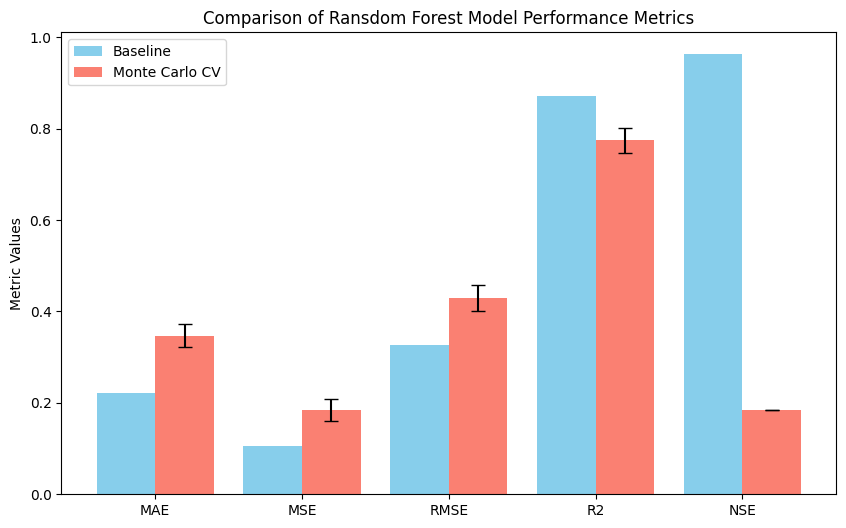

In [74]:
# Baseline metrics from your original train-test split
baseline_metrics = {
    'MAE': 0.2215,
    'MSE': 0.1067,
    'RMSE': 0.3267,
    'R2': 0.8719,
    'NSE': 0.9628
}

# Mean metrics from Monte Carlo Cross-Validation
mccv_mean_metrics = {metric: np.mean(values) for metric, values in mccv_metrics.items()}
mccv_std_metrics = {metric: np.std(values) for metric, values in mccv_metrics.items()}

# Prepare data for plotting
metrics_names = list(baseline_metrics.keys())
baseline_values = list(baseline_metrics.values())
mccv_values = [mccv_mean_metrics['MAE'], mccv_mean_metrics['MSE'], mccv_mean_metrics['RMSE'], mccv_mean_metrics['R2'], mccv_mean_metrics['MSE']]

x = np.arange(len(metrics_names))

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - 0.2, baseline_values, 0.4, color='skyblue', label='Baseline')  # Change color for baseline bars
ax.bar(x + 0.2, mccv_values, 0.4, color='salmon', yerr=[mccv_std_metrics['MAE'], mccv_std_metrics['MSE'], mccv_std_metrics['RMSE'], mccv_std_metrics['R2'], 0], 
       label='Monte Carlo CV', capsize=5)  # Change color for MCCV bars

# Add labels and title
ax.set_xticks(x)
ax.set_xticklabels(metrics_names)
ax.set_ylabel('Metric Values')
ax.set_title('Comparison of Ransdom Forest Model Performance Metrics')
ax.legend()

plt.show()
